<a href="https://colab.research.google.com/github/progsthegr8/projetHeart/blob/main/process_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
from scipy.io.wavfile import read
from scipy.io.wavfile import write  
from scipy import signal
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

In [ ]:
(Frequency,arr)=read('/content/Pn_POA_Co3_P4.wav')

In [ ]:
print(len(arr))
print(arr)

160000
[  -1   -1   13 ... 5582 5644 5782]


Text(0, 0.5, 'Amplitude')

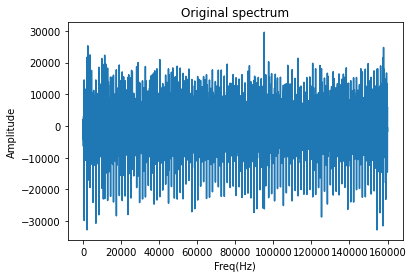

In [ ]:
plt.plot(arr)
plt.title('Original spectrum')
plt.xlabel('Freq(Hz)')
plt.ylabel('Amplitude')

In [ ]:
FourierTransfo=sp.fft(arr)#calculating the fts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """Entry point for launching an IPython kernel.


In [ ]:
scale = sp.linspace(0, Frequency, len(arr))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Amplitude')

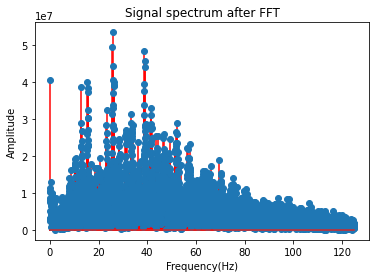

In [ ]:
plt.stem(scale[0:5000], np.abs(FourierTransfo[0:5000]), 'r')  # The size of our diagram
plt.title('Signal spectrum after FFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

In [ ]:
GuassianNoise = np.random.rand(len(FourierTransfo)) # Adding guassian Noise to the signal.

In [ ]:
NewSound = GuassianNoise + arr

Text(0, 0.5, 'Amplitude')

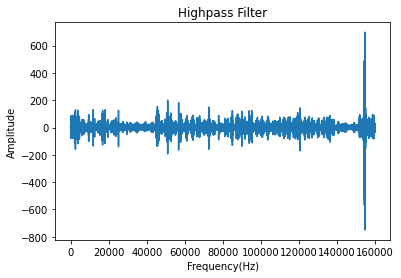

In [ ]:
b,a = signal.butter(5, 1000/(Frequency/2), btype='highpass') # ButterWorth filter 4350
filteredSignal = signal.lfilter(b,a,NewSound)
plt.plot(filteredSignal) # plotting the signal.
plt.title('Highpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

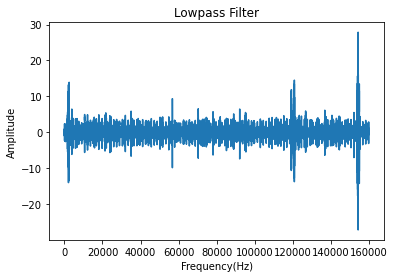

In [ ]:
c,d = signal.butter(5, 380/(Frequency/2), btype='lowpass') # ButterWorth low-filter
newFilteredSignal = signal.lfilter(c,d,filteredSignal) # Applying the filter to the signal
plt.plot(newFilteredSignal) # plotting the signal.
plt.title('Lowpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

In [ ]:
write("test.wav", Frequency, newFilteredSignal)

In [20]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from pathlib import Path
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Reports
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [21]:
sr = 16000
file1 ='/content/test.wav'
y1,sr = librosa.load(file1, mono=True, sr=sr, offset=0, duration=10)
from IPython.display import Audio, IFrame, display
display(Audio(y1,rate=sr))

In [22]:
(Freq,arr1)=read('/content/test.wav')

In [ ]:
plt.plot(arr1)
plt.title('Original spectrum')
plt.xlabel('Freq(Hz)')
plt.ylabel('Amplitude')

In [ ]:
FourierTransfo1=sp.fft(arr1)
scale1 = sp.linspace(0, Frequency, len(arr1))
plt.stem(scale1[0:5000], np.abs(FourierTransfo1[0:5000]), 'r')  # The size of our diagram
plt.title('Signal spectrum after FFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

In [ ]:
# Here's a sample generate mfccs from a wave file
normal_file="/content/test.wav"
#y, sr = librosa.load(sample_file, offset=7, duration=7)
y, sr = librosa.load(normal_file)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print (mfccs)

In [ ]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
log_S=librosa.feature.mfcc(S=librosa.power_to_db(S))
print (log_S)

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(12, 3))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients (MFCCs)')
plt.tight_layout()

In [ ]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

In [29]:
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

In [ ]:
D = np.abs(librosa.stft(y))
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)